# Setup Basic Functions

## Why Monte Carlo ?

We assume we know the transition probability of all state. However, we never actually play the game. In Monte Carlo, we learn from experience. We play a few episode, and calculate the average return. 

We don't need to visit all states. 

We use explore start technique to make sure we have adequet amount of access to different states

In [3]:
import numpy as np

class Grid:
    def __init__(self, width, height, start):
        self.width = width
        self.height = height
        self.i = start[0]
        self.j = start[1]
        
    def set(self, rewards, actions):
        self.rewards = rewards
        self.actions = actions
        
    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]
        
    def current_state(self):
        return (self.i, self.j)
    
    def is_terminal(self, s):
        return s not in self.actions
    
    def move(self, action):
        
        if action in self.actions[(self.i, self.j)]:
            if action == 'U':
                self.i -= 1
            elif action == 'D':
                self.i += 1
            elif action == 'R':
                self.j += 1
            elif action == 'L':
                self.j -= 1
            
        return self.rewards.get((self.i, self.j), 0)
    
    def undo_move(self, action):
        if action == 'U':
            self.i += 1
        elif action == 'D':
            self.i -= 1
        elif action == 'R':
            self.j -= 1
        elif action == 'L':
            self.j += 1
            
        
        assert(self.current_state() in self.all_states())
        
    
    def game_over(self):
        
        return (self.i, self.j) not in self.actions
        
    def all_states(self):
        
        return set(list(self.actions.keys()) + list(self.rewards.keys()))
    
    
    def standard_grid():
        
        g = Grid(3,4,(2,0))
        rewards = {(0,3):1, (1,3): -1}
        actions = {
            (0, 0): ('D', 'R'),
            (0, 1): ('L', 'R'),
            (0, 2): ('L', 'D', 'R'),
            (1, 0): ('U', 'D'),
            (1, 2): ('U', 'D', 'R'),
            (2, 0): ('U', 'R'),
            (2, 1): ('L', 'R'),
            (2, 2): ('L', 'R', 'U'),
            (2, 3): ('L', 'U'),
        }
        
        g.set(rewards, actions)
        return g
    
    def negative_grid(step_cost=-0.1):
        g = Grid.standard_grid()
        g.rewards.update({
            (0, 0): step_cost,
            (0, 1): step_cost,
            (0, 2): step_cost,
            (1, 0): step_cost,
            (1, 2): step_cost,
            (2, 0): step_cost,
            (2, 1): step_cost,
            (2, 2): step_cost,
            (2, 3): step_cost,
            
        })
        
        return g


def print_values(V, g):
    
    print("width:%d, height:%d" % (g.width, g.height))
    
    for i in range(g.width):
        print("------------------------")
        
        for j in range(g.height):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="")
        
        print ("")
        
def print_policy(P, g):
    for i in range(g.width):
        print("---------------------------")
        for j in range(g.height):
            a = P.get((i,j), 0)
            print(" %s |" % a, end="")
        print ("")


In [7]:

SMALL_ENOUGH = 1e-3
gamma = 0.9
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

def play_game(grid, policy):
    
    start_states = list(grid.actions.keys())
    start_idx = np.random.choice(len(start_states))
    grid.set_state(start_states[start_idx])
    
    s = grid.current_state()
    states_and_rewards = [(s,0)]
    
    while not grid.game_over():
        a = policy[s]
        r = grid.move(a)
        s = grid.current_state()
        states_and_rewards.append((s,r))
        
    
    G = 0
    states_and_returns =[]
    first = True
    
    for s, r in reversed(states_and_rewards):
        
        if first:
            first = False
        else:
            states_and_returns.append((s,G))
            
        G = r + gamma * G
        
    states_and_returns.reverse()
    return states_and_returns


grid = Grid.standard_grid()

print("rewards:")
print_values(grid.rewards, grid)


# this should be a random action
policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'R',
    (2, 1): 'R',
    (2, 2): 'R',
    (2, 3): 'U',
  }

V = {}
returns = {}
states = grid.all_states()

for s in states:
    if s in grid.actions:
        returns[s] = []
    else:
        V[s] = 0

for t in range(100):
    
    
    print("Episode %d" % t)
    states_and_returns = play_game(grid, policy)
    seen_states = set()
    
    for s, G in states_and_returns:
        
        if s not in seen_states:
            returns[s].append(G)
            V[s] = np.mean(returns[s])
            seen_states.add(s)

            
            
print("final values:")
print_values(V, grid)
print("final policy:")
print_policy(policy, grid)

rewards:
width:3, height:4
------------------------
 0.00| 0.00| 0.00| 1.00|
------------------------
 0.00| 0.00| 0.00|-1.00|
------------------------
 0.00| 0.00| 0.00| 0.00|
Episode 0
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10
Episode 11
Episode 12
Episode 13
Episode 14
Episode 15
Episode 16
Episode 17
Episode 18
Episode 19
Episode 20
Episode 21
Episode 22
Episode 23
Episode 24
Episode 25
Episode 26
Episode 27
Episode 28
Episode 29
Episode 30
Episode 31
Episode 32
Episode 33
Episode 34
Episode 35
Episode 36
Episode 37
Episode 38
Episode 39
Episode 40
Episode 41
Episode 42
Episode 43
Episode 44
Episode 45
Episode 46
Episode 47
Episode 48
Episode 49
Episode 50
Episode 51
Episode 52
Episode 53
Episode 54
Episode 55
Episode 56
Episode 57
Episode 58
Episode 59
Episode 60
Episode 61
Episode 62
Episode 63
Episode 64
Episode 65
Episode 66
Episode 67
Episode 68
Episode 69
Episode 70
Episode 71
Episode 72
Episode 73
Episode 74
Episode 

## Now we perform policy optimization. We pick the action that generate best value function. 

rewards:
width:3, height:4
------------------------
-0.90|-0.90|-0.90| 1.00|
------------------------
-0.90| 0.00|-0.90|-1.00|
------------------------
-0.90|-0.90|-0.90|-0.90|
 iteration : 0
 iteration : 100
 iteration : 200
 iteration : 300
 iteration : 400
 iteration : 500
 iteration : 600
 iteration : 700
 iteration : 800
 iteration : 900
 iteration : 1000
 iteration : 1100
 iteration : 1200
 iteration : 1300
 iteration : 1400
 iteration : 1500
 iteration : 1600
 iteration : 1700
 iteration : 1800
 iteration : 1900


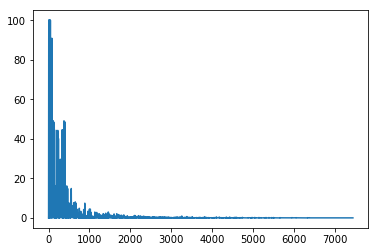

final policy:
---------------------------
 R | R | R | 0 |
---------------------------
 U | 0 | U | 0 |
---------------------------
 R | R | U | U |
final values:
width:3, height:4
------------------------
-0.90| 0.00| 1.00| 0.00|
------------------------
-2.04| 0.00| 0.00| 0.00|
------------------------
-2.67|-1.99|-1.01|-1.00|


In [21]:
import matplotlib.pyplot as plt

gamma = 0.9
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')



def play_game(grid, policy):
  
    start_states = list(grid.actions.keys())
    start_idx = np.random.choice(len(start_states))
    grid.set_state(start_states[start_idx])

    s = grid.current_state()
    a = np.random.choice(ALL_POSSIBLE_ACTIONS) # first action is uniformly random
    
    states_actions_rewards = [(s,a,0)]
    seen_states = set()
    
    while True:
        old_s = grid.current_state()
        #print("old state: %s" % str(old_s))
        r = grid.move(a)
        s = grid.current_state()
        
        if s in seen_states:
            
            states_actions_rewards.append((s, None, -100))
            break
        elif grid.game_over():
            states_actions_rewards.append((s, None, r))
            break
        else:
            a = policy[s]
            states_actions_rewards.append((s,a,r))
        seen_states.add(s)

        
    G = 0
    states_actions_returns = []
    first = True
    for s, a, r in reversed(states_actions_rewards):
        
        if first:
            first = False
        else:
            states_actions_returns.append((s, a, G))
            
        G = r + gamma * G
    
    states_actions_returns.reverse()
    
    return states_actions_returns

def max_dict(d):
    
    max_key = None
    max_val = float('-inf')
    
    for k, v in d.items():
        
        if v > max_val:
            max_val = v
            max_key = k
            
    return max_key, max_val
        

grid = Grid.negative_grid(step_cost=-0.9)

print("rewards:")
print_values(grid.rewards, grid)


policy = {}

for s in list(grid.actions.keys()):
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)


Q = {}
returns = {}
states = grid.all_states()

for s in states:
    if s in grid.actions:
        Q[s] = {}
        for a in ALL_POSSIBLE_ACTIONS:
            Q[s][a] = 0
            returns[(s,a)] = []
    else:
        pass

deltas = []

for t in range(2000):
    if t % 100 == 0:
        print(" iteration : %d" % t)
        
    biggest_change = 0
    states_actions_returns = play_game(grid, policy)
    seen_state_action_pairs = set()
    
    for s, a, G in states_actions_returns:
        
        sa = (s, a)
        if sa not in seen_state_action_pairs:
            old_q = Q[s][a]
            returns[sa].append(G)
            Q[s][a] = np.mean(returns[sa])
            
            biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
            seen_state_action_pairs.add(sa)
        
        deltas.append(biggest_change)
        
        for s in policy.keys():
            policy[s] = max_dict(Q[s])[0]
            
plt.plot(deltas)
plt.show()
          
    

print("final policy:")
print_policy(policy, grid)

  # find V
V = {}
for s, Qs in Q.items():
    V[s] = max_dict(Q[s])[1]

print("final values:")
print_values(V, grid)
